In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
import warnings
warnings.filterwarnings('ignore')

## Load the Data

In [164]:
train_data = '/kaggle/input/playground-series-s4e10/train.csv'
test_data = '/kaggle/input/playground-series-s4e10/test.csv'
sample_submission = '/kaggle/input/playground-series-s4e10/sample_submission.csv'

## Exploratory Data Analysis (EDA)

In [165]:
df = pd.read_csv(train_data)

In [166]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [167]:
df.shape

(58645, 13)

In [168]:
df['loan_status'].value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

In [169]:
df.nunique()

id                            58645
person_age                       53
person_income                  2641
person_home_ownership             4
person_emp_length                36
loan_intent                       6
loan_grade                        7
loan_amnt                       545
loan_int_rate                   362
loan_percent_income              61
cb_person_default_on_file         2
cb_person_cred_hist_length       29
loan_status                       2
dtype: int64

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [171]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [172]:
df.describe(include = 'O')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,58645,58645,58645,58645
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,30594,12271,20984,49943


In [173]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


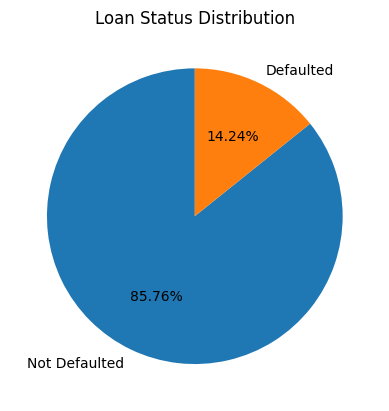

In [174]:
loan_status_counts = df['loan_status'].value_counts()
labels = ['Not Defaulted', 'Defaulted']
plt.pie(loan_status_counts,autopct='%.2f%%', labels=labels,startangle=90)
plt.title('Loan Status Distribution')
plt.show()

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>],
       [<Axes: title={'center': 'person_emp_length'}>,
        <Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>],
       [<Axes: title={'center': 'loan_percent_income'}>,
        <Axes: title={'center': 'cb_person_cred_hist_length'}>,
        <Axes: title={'center': 'loan_status'}>]], dtype=object)

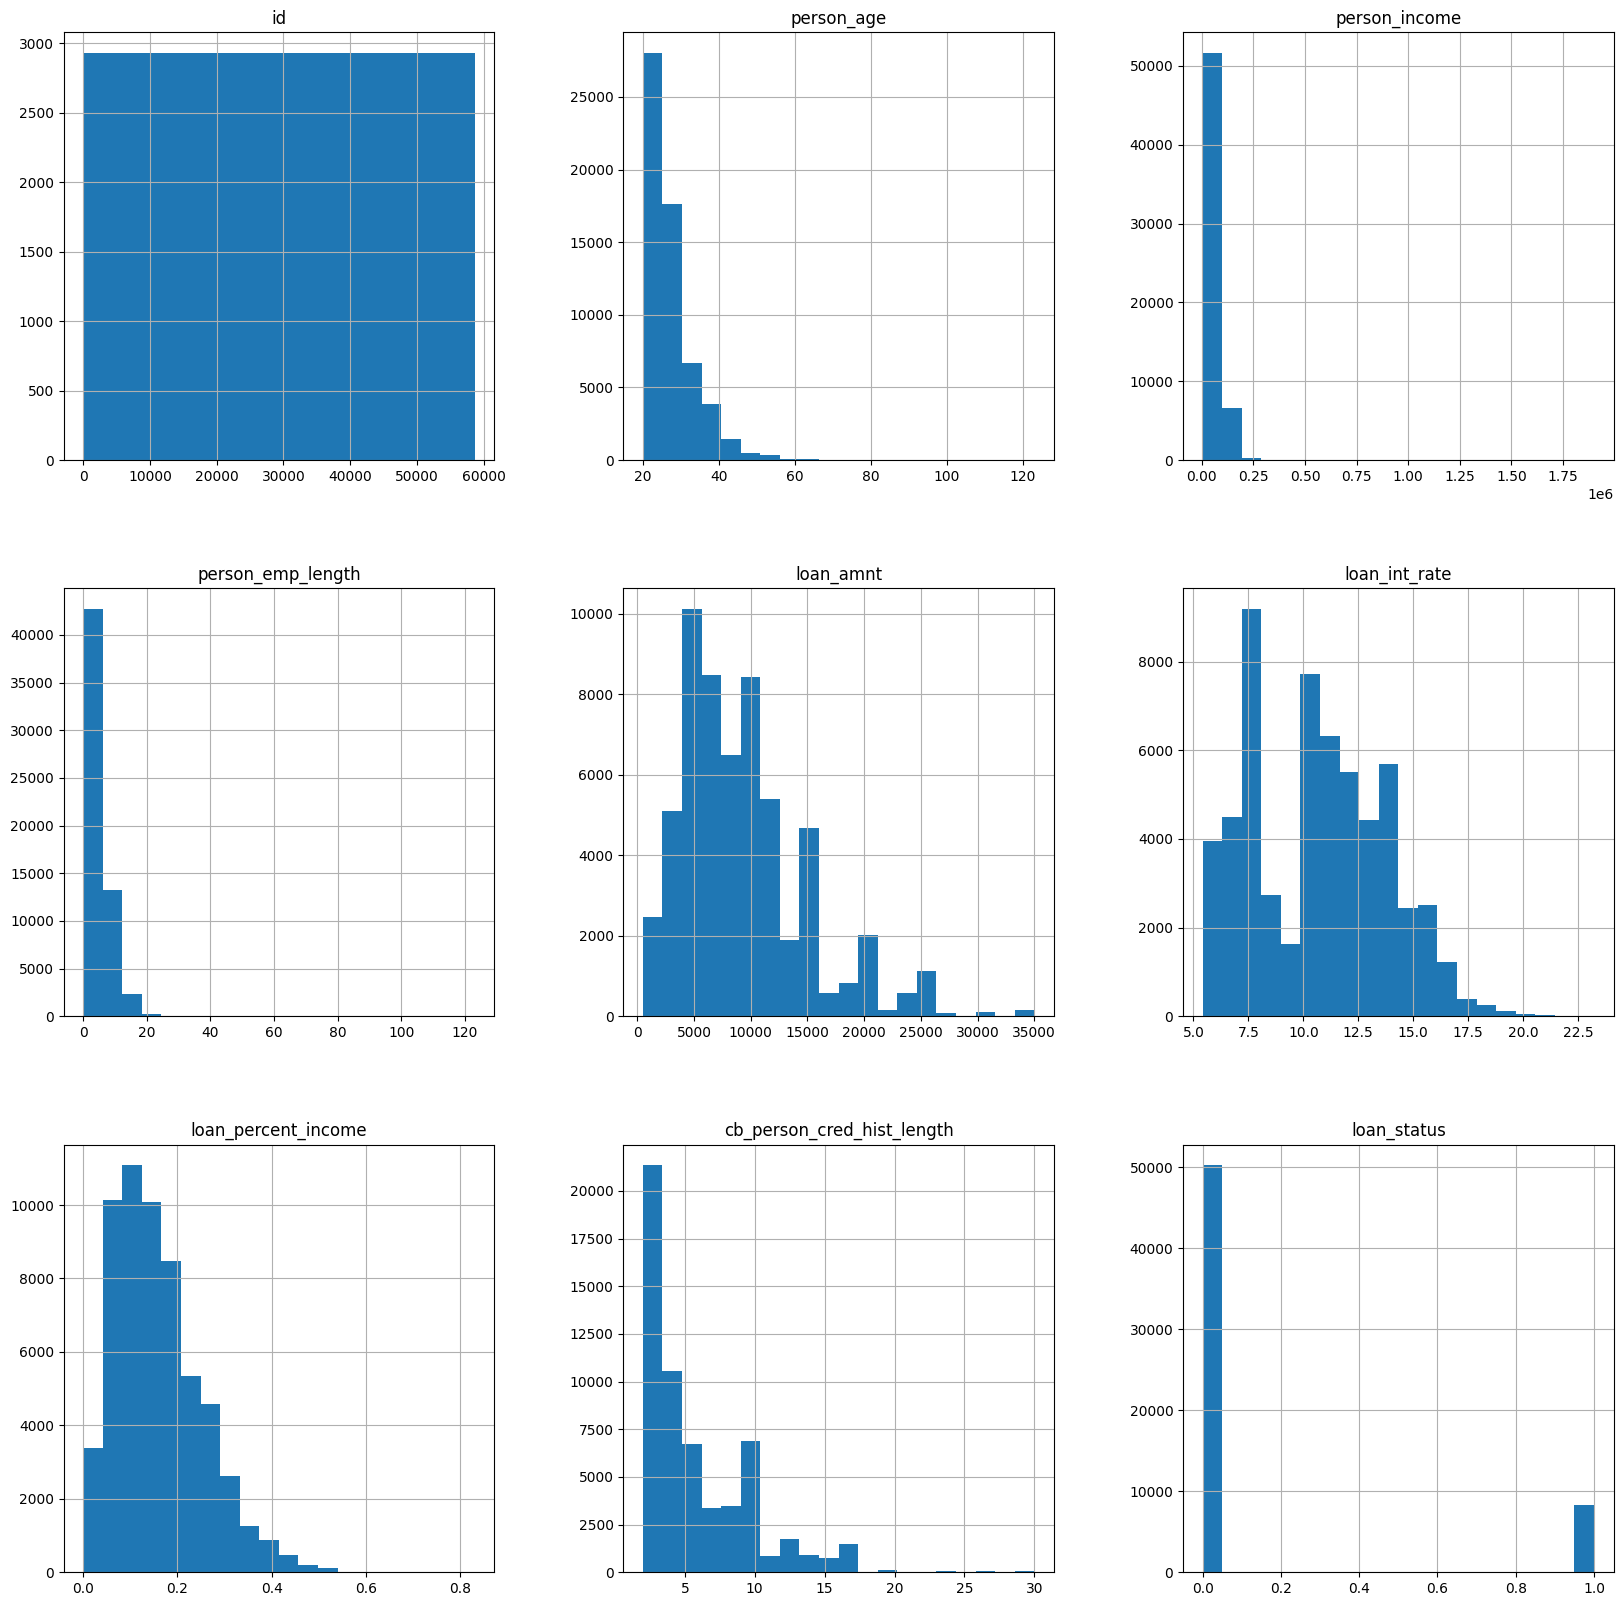

In [175]:
df.hist(figsize = (20,20),bins = 20)

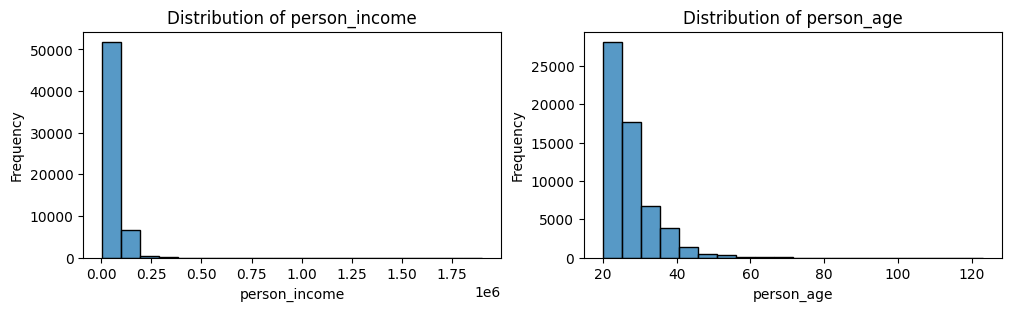

In [176]:
columns_age_income  = ['person_income','person_age']
fig, axs = plt.subplots(1, 2,figsize = (10,3), constrained_layout=True)
for i , col in enumerate(columns_age_income ):
    sns.histplot(data = df,x = col,bins = 20 ,ax = axs[i])
    axs[i].set_title(f"Distribution of {col}")
    axs[i].set_xlabel(f'{col}')
    axs[i].set_ylabel('Frequency')
plt.show()

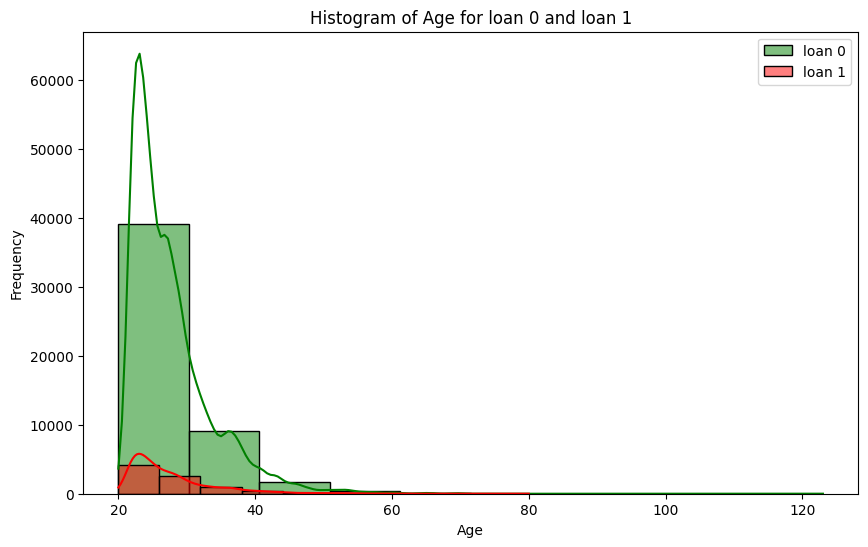

In [177]:
loan_0_age = df[df["loan_status"] == 0]["person_age"]
loan_1_age = df[df["loan_status"] == 1]["person_age"]
plt.figure(figsize=(10, 6))
sns.histplot(loan_0_age, bins=10, color="Green", label="loan 0", kde=True)
sns.histplot(loan_1_age, bins=10, color="Red", label="loan 1", kde=True)


plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age for loan 0 and loan 1")
plt.legend()
plt.show()

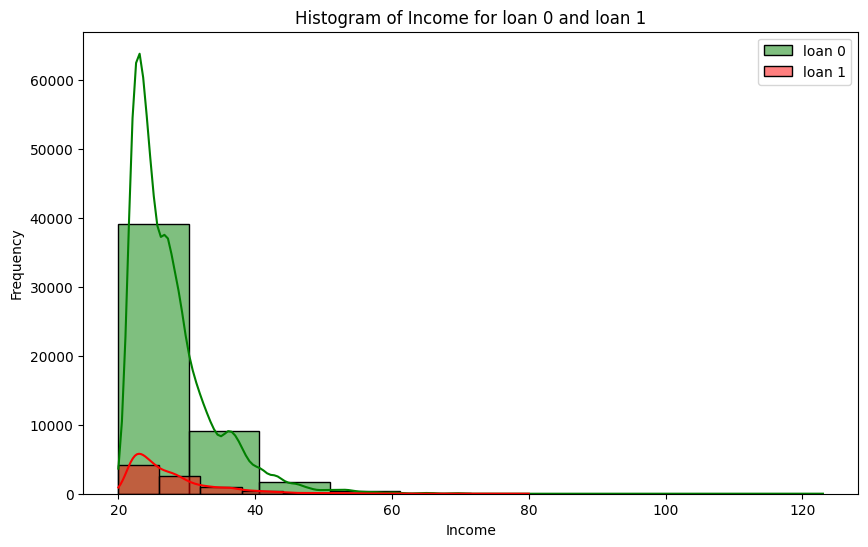

In [178]:
loan_0_income = df[df["loan_status"] == 0]["person_income"]
loan_1_income = df[df["loan_status"] == 1]["person_income"]
plt.figure(figsize=(10, 6))
sns.histplot(loan_0_age, bins=10, color="Green", label="loan 0", kde=True)
sns.histplot(loan_1_age, bins=10, color="Red", label="loan 1", kde=True)


plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Histogram of Income for loan 0 and loan 1")
plt.legend()
plt.show()

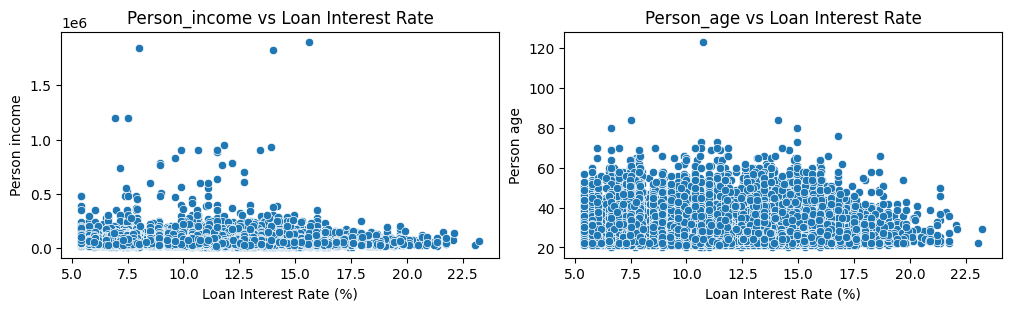

In [179]:
fig, axs = plt.subplots(1, 2,figsize = (10,3), constrained_layout=True)
for i , col in enumerate(columns_age_income):
    sns.scatterplot(x=df['loan_int_rate'], y=df[col], ax=axs[i])
    axs[i].set_title(f'{col.capitalize()} vs Loan Interest Rate')
    axs[i].set_xlabel('Loan Interest Rate (%)')
    axs[i].set_ylabel(col.replace('_', ' ').capitalize())
plt.show()

In [180]:
print(df['person_income'].max(), df['person_income'].min())
print(df['person_age'].max(),df['person_age'].min())

1900000 4200
123 20


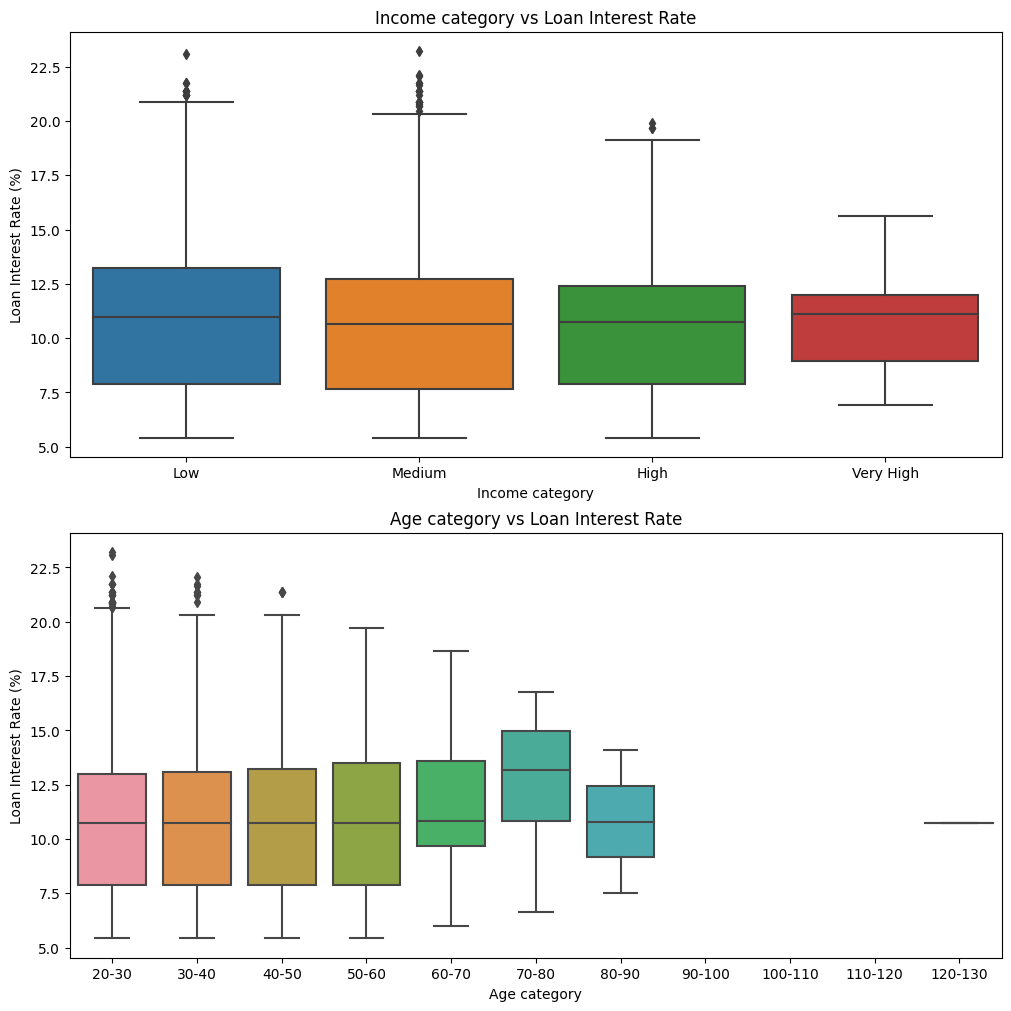

In [181]:
df['income_category'] = pd.cut(df['person_income'], 
                               bins=[4200, 50000, 150000, 500000, 1900000], 
                               labels=['Low', 'Medium', 'High', 'Very High'])

df['age_category'] = pd.cut(df['person_age'], 
                            bins=[20, 30, 40, 50, 60, 70,80,90,100,110,120,130],
                            labels=['20-30', '30-40', '40-50', '50-60', '60-70','70-80','80-90','90-100','100-110','110-120','120-130'])

columns_age_income_category = df[['income_category','age_category']]
fig, axs = plt.subplots(2, 1,figsize = (10,10), constrained_layout=True)
for i, col in enumerate(columns_age_income_category):
    sns.boxplot(x=df[col], y=df['loan_int_rate'], data=df, ax=axs[i]) 
    axs[i].set_title(f'{col.replace("_", " ").capitalize()} vs Loan Interest Rate')  
    axs[i].set_xlabel(col.replace('_', ' ').capitalize()) 
    axs[i].set_ylabel('Loan Interest Rate (%)')
plt.show()

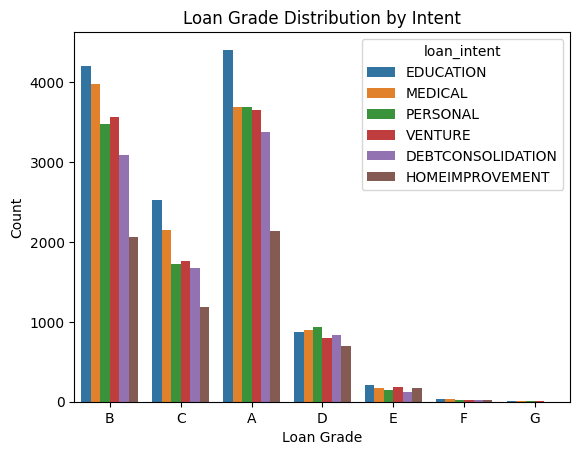

In [182]:
sns.countplot(x='loan_grade', hue='loan_intent', data=df)
plt.title('Loan Grade Distribution by Intent')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.show()

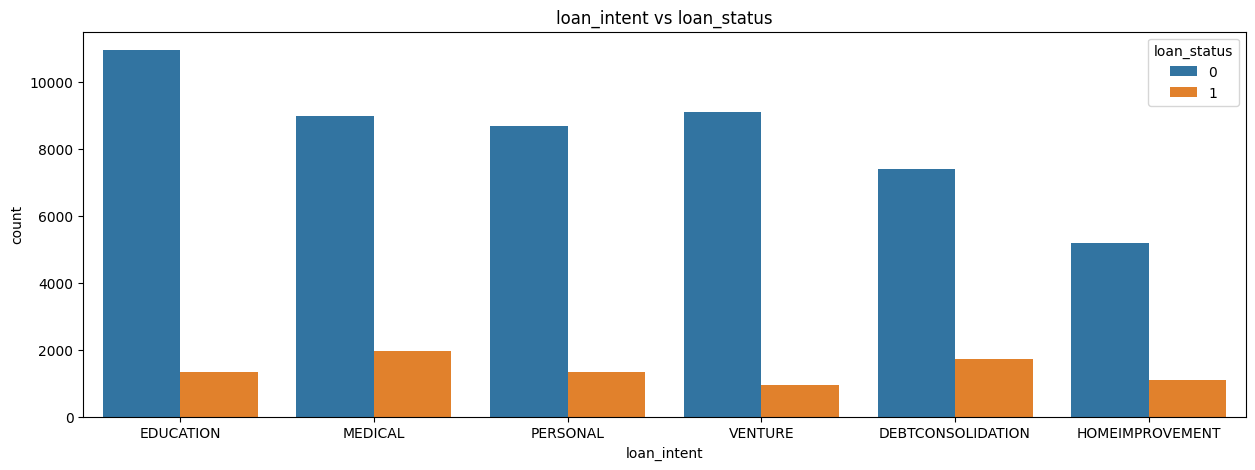

In [183]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'loan_intent' , hue = 'loan_status' , data = df)
plt.title('loan_intent vs loan_status')
plt.xlabel('loan_intent')
plt.ylabel('count')
plt.show()

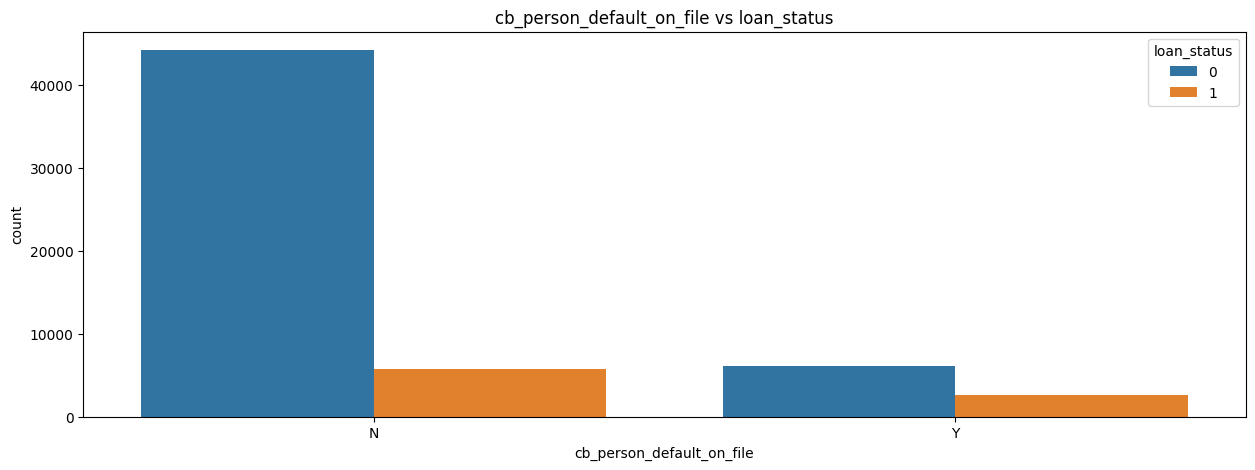

In [184]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'cb_person_default_on_file' , hue = 'loan_status' , data = df)
plt.title('cb_person_default_on_file vs loan_status')
plt.xlabel('cb_person_default_on_file')
plt.ylabel('count')
plt.show()

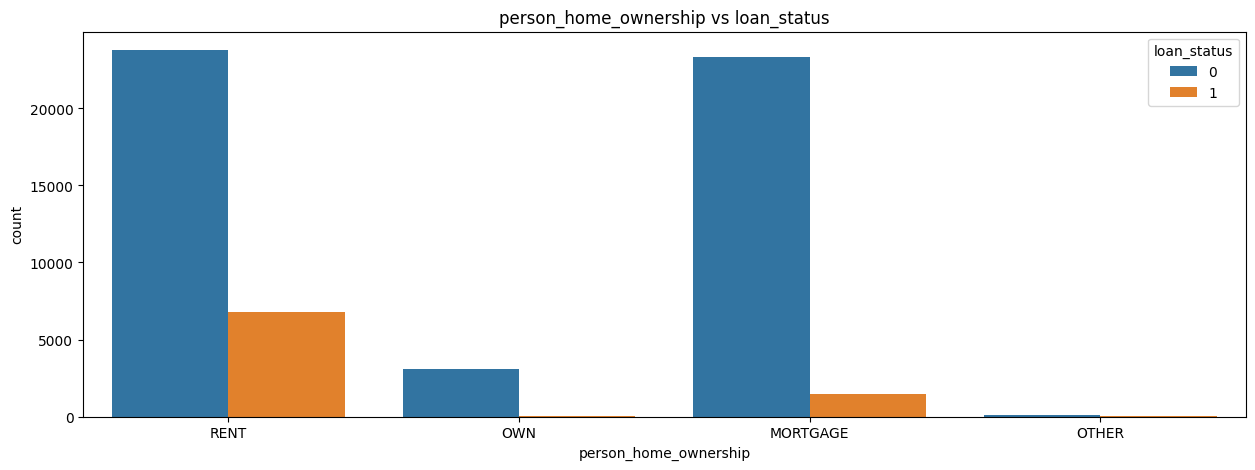

In [185]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'person_home_ownership' , hue = 'loan_status' , data = df)
plt.title('person_home_ownership vs loan_status')
plt.xlabel('person_home_ownership')
plt.ylabel('count')
plt.show()

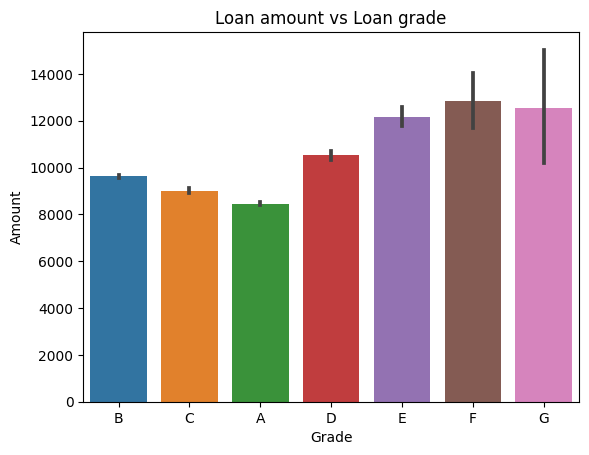

In [186]:
sns.barplot(x = 'loan_grade' , y = 'loan_amnt',data = df)
plt.title("Loan amount vs Loan grade")
plt.xlabel("Grade")
plt.ylabel("Amount")
plt.show()

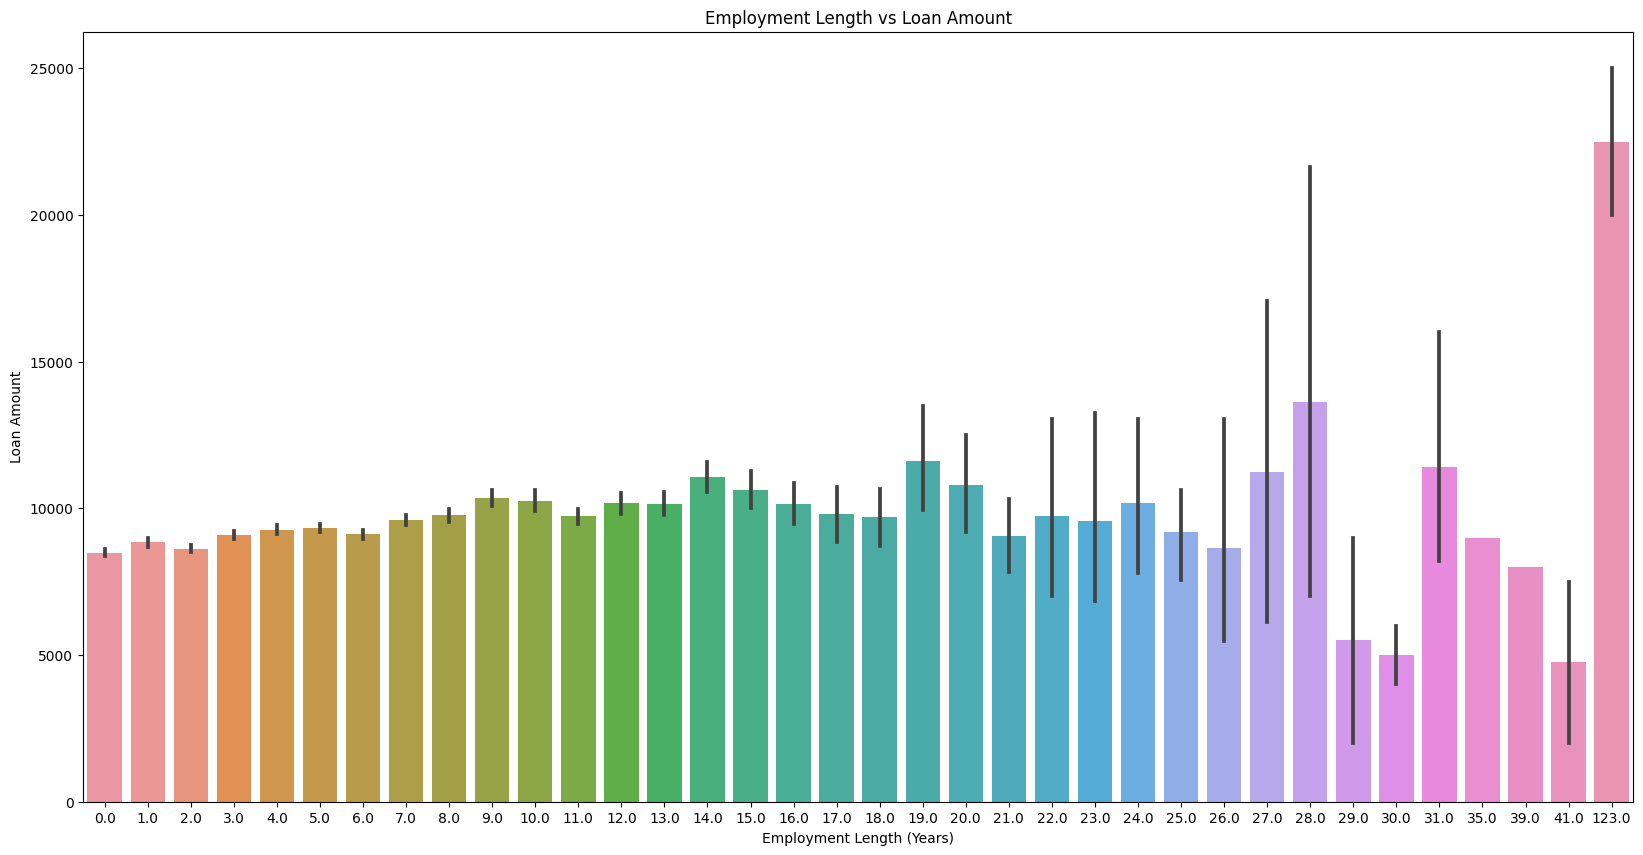

In [187]:
plt.figure(figsize=(20, 10))
sns.barplot(x='person_emp_length', y='loan_amnt', data=df)
plt.title('Employment Length vs Loan Amount')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Loan Amount')
plt.show()

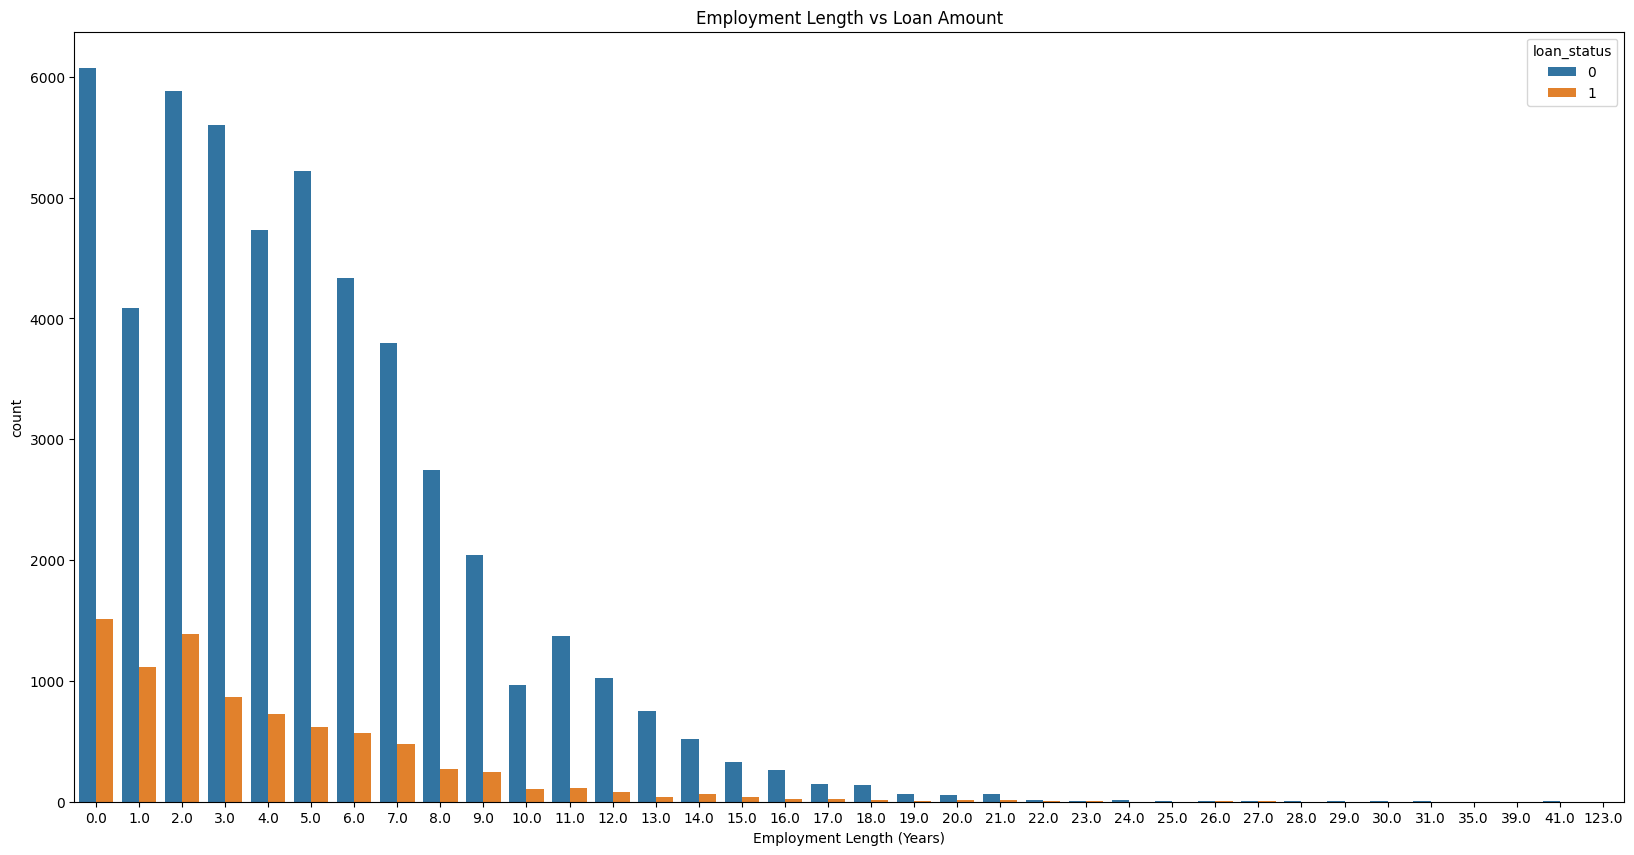

In [188]:
plt.figure(figsize=(20, 10))
sns.countplot(x='person_emp_length',hue = 'loan_status', data=df)
plt.title('Employment Length vs Loan Amount')
plt.xlabel('Employment Length (Years)')
plt.ylabel('count')
plt.show()